In [16]:
### IMPORTS

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import ml_combat as ml
from ml_combat import data

In [20]:
## Get training data and add columns
train_df = data.get_training_cleaned()
train_df['total_rad_1h:J'] = train_df['diffuse_rad_1h:J'] + train_df['direct_rad_1h:J']    
# Extracting hour-of-day and month, and making them cyclical
train_df['hour'] = train_df['ds'].dt.hour
ml.utils.map_hour_to_seasonal(train_df, 'hour')
train_df['month'] = train_df['ds'].dt.month
ml.utils.map_month_to_seasonal(train_df, 'month')
print(train_df.columns)



Index(['location', 'ds', 'y', 'weather_data_type', 'absolute_humidity_2m:gm3',
       'air_density_2m:kgm3', 'ceiling_height_agl:m', 'clear_sky_energy_1h:J',
       'clear_sky_rad:W', 'cloud_base_agl:m', 'dew_or_rime:idx',
       'dew_point_2m:K', 'diffuse_rad:W', 'diffuse_rad_1h:J', 'direct_rad:W',
       'direct_rad_1h:J', 'effective_cloud_cover:p', 'elevation:m',
       'fresh_snow_12h:cm', 'fresh_snow_1h:cm', 'fresh_snow_24h:cm',
       'fresh_snow_3h:cm', 'fresh_snow_6h:cm', 'is_day:idx',
       'is_in_shadow:idx', 'msl_pressure:hPa', 'precip_5min:mm',
       'precip_type_5min:idx', 'pressure_100m:hPa', 'pressure_50m:hPa',
       'prob_rime:p', 'rain_water:kgm2', 'relative_humidity_1000hPa:p',
       'sfc_pressure:hPa', 'snow_density:kgm3', 'snow_depth:cm',
       'snow_drift:idx', 'snow_melt_10min:mm', 'snow_water:kgm2',
       'sun_azimuth:d', 'sun_elevation:d', 'super_cooled_liquid_water:kgm2',
       't_1000hPa:K', 'total_cloud_cover:p', 'visibility:m',
       'wind_speed_10m:

In [21]:
train_df.head()

,location,ds,y,weather_data_type,absolute_humidity_2m:gm3,air_density_2m:kgm3,ceiling_height_agl:m,clear_sky_energy_1h:J,clear_sky_rad:W,cloud_base_agl:m,...,t_1000hPa:K,total_cloud_cover:p,visibility:m,wind_speed_10m:ms,wind_speed_u_10m:ms,wind_speed_v_10m:ms,wind_speed_w_1000hPa:ms,total_rad_1h:J,hour,month
0,A,2019-06-02 22:00:00,0.00,observed,7.700,1.22825,1728.950012,0.000000,0.00,1728.950012,...,286.224998,100.000,40386.475586,3.600,-3.575,-0.500,0.0,0.000000,2,6
1,A,2019-06-02 23:00:00,0.00,observed,7.700,1.22350,1689.824982,0.000000,0.00,1689.824982,...,286.899994,100.000,33770.649414,3.350,-3.350,0.275,0.0,0.000000,1,6
2,A,2019-06-03 00:00:00,0.00,observed,7.875,1.21975,1563.225006,0.000000,0.00,1563.225006,...,286.949997,100.000,13595.500000,3.050,-2.950,0.750,0.0,0.000000,0,6
3,A,2019-06-03 01:00:00,0.00,observed,8.425,1.21800,1283.425018,208.649994,0.75,1283.425018,...,286.750000,100.000,2321.850037,2.725,-2.600,0.875,0.0,526.775024,1,6
4,A,2019-06-03 02:00:00,19.36,observed,8.950,1.21800,1003.500000,32468.150269,23.10,1003.500000,...,286.449997,99.225,11634.799683,2.550,-2.350,0.925,0.0,22351.924713,2,6


In [26]:
## TRAININ DATA FILES TO CSV
import os

## Store in csv files
directory_path = r'C:\Users\Simen\OneDrive\Dokumenter\02 School\01 NTNU\7. semester (2023H)\TDT4173 Machine Learning\stabekk\data'

# Get unique locations
locations = train_df['location'].unique()

# Dictionary to keep track of file paths for download links
file_paths = {}

# Iterate over locations and write each subset of the DataFrame to a CSV file
for location in locations:
    # Filter the DataFrame by location
    df_subset = train_df[train_df['location'] == location]
    # Define the file path using os.path.join to ensure correct path formation
    file_path = os.path.join(directory_path, f'train_df_{location}.csv')
    # Write to CSV without the index
    df_subset.to_csv(file_path, index=False)
    # Store the path for download
    file_paths[location] = file_path

file_paths

{'A': 'C:\\Users\\Simen\\OneDrive\\Dokumenter\\02 School\\01 NTNU\\7. semester (2023H)\\TDT4173 Machine Learning\\stabekk\\data\\train_df_A.csv',
 'B': 'C:\\Users\\Simen\\OneDrive\\Dokumenter\\02 School\\01 NTNU\\7. semester (2023H)\\TDT4173 Machine Learning\\stabekk\\data\\train_df_B.csv',
 'C': 'C:\\Users\\Simen\\OneDrive\\Dokumenter\\02 School\\01 NTNU\\7. semester (2023H)\\TDT4173 Machine Learning\\stabekk\\data\\train_df_C.csv'}

In [9]:
# Assuming train_df is already defined and contains your training data

# Filter the DataFrame for each location and assign it to the respective variables
df_a = train_df[train_df['location'] == 'A']
df_b = train_df[train_df['location'] == 'B']
df_c = train_df[train_df['location'] == 'C']

# At this point, df_a, df_b, and df_c contain the data for locations A, B, and C respectively
# You can now proceed to use these DataFrames for further analysis or manipulation


[]


In [ ]:
def is_autogluon_installed():
    try:
        # Attempt to import an AutoGluon module
        from autogluon.tabular import TabularPredictor
        return True
    except ImportError:
        return False

# Check if AutoGluon is installed
is_autogluon_installed()

In [15]:
# Get all attributes (including functions) of the data module
all_attributes = dir(data)

# Filter and print only the functions
functions = [attr for attr in all_attributes if callable(getattr(data, attr))]
for function_name in functions:
    print(function_name)

get_testing
get_testing_flattened
get_training
get_training_cleaned
get_training_flattened
get_training_groupby_mean


In [87]:
### GET PATH TO DATA FOLDER
current_dir = os.path.abspath("")
parent_dir = os.path.join(current_dir, os.pardir)

# Add to sys.path
sys.path.append(parent_dir)

In [89]:
### GET TRAINING AND TEST DATA
train_df = data.get_training_flattened()
test_df = data.get_testing_flattened()

train_df['total_rad_1h:J'] = train_df['direct_rad_1h:J'] + train_df['diffuse_rad_1h:J']

train_df.to_csv("training_data.csv", index=False)

location = "A"
location_df = train_df[train_df['location'] == location]



In [65]:
### DISPLAY COLS IN TRAINING DF
print(train_df.columns)

Index(['location', 'ds', 'y', 'weather_data_type', 'absolute_humidity_2m:gm3',
       'air_density_2m:kgm3', 'ceiling_height_agl:m', 'clear_sky_energy_1h:J',
       'clear_sky_rad:W', 'cloud_base_agl:m', 'dew_or_rime:idx',
       'dew_point_2m:K', 'diffuse_rad:W', 'diffuse_rad_1h:J', 'direct_rad:W',
       'direct_rad_1h:J', 'effective_cloud_cover:p', 'elevation:m',
       'fresh_snow_12h:cm', 'fresh_snow_1h:cm', 'fresh_snow_24h:cm',
       'fresh_snow_3h:cm', 'fresh_snow_6h:cm', 'is_day:idx',
       'is_in_shadow:idx', 'msl_pressure:hPa', 'precip_5min:mm',
       'precip_type_5min:idx', 'pressure_100m:hPa', 'pressure_50m:hPa',
       'prob_rime:p', 'rain_water:kgm2', 'relative_humidity_1000hPa:p',
       'sfc_pressure:hPa', 'snow_density:kgm3', 'snow_depth:cm',
       'snow_drift:idx', 'snow_melt_10min:mm', 'snow_water:kgm2',
       'sun_azimuth:d', 'sun_elevation:d', 'super_cooled_liquid_water:kgm2',
       't_1000hPa:K', 'total_cloud_cover:p', 'visibility:m',
       'wind_speed_10m:

In [90]:
train_df.head()

,location,ds,y,weather_data_type,absolute_humidity_2m:gm3,air_density_2m:kgm3,ceiling_height_agl:m,clear_sky_energy_1h:J,clear_sky_rad:W,cloud_base_agl:m,...,sun_elevation:d,super_cooled_liquid_water:kgm2,t_1000hPa:K,total_cloud_cover:p,visibility:m,wind_speed_10m:ms,wind_speed_u_10m:ms,wind_speed_v_10m:ms,wind_speed_w_1000hPa:ms,total_rad_1h:J
0,A,2019-06-02 22:00:00,0.00,observed,7.700,1.22825,1728.950012,0.000000,0.00,1728.950012,...,-3.77425,0.0,286.224998,100.000,40386.475586,3.600,-3.575,-0.500,0.0,0.000000
1,A,2019-06-02 23:00:00,0.00,observed,7.700,1.22350,1689.824982,0.000000,0.00,1689.824982,...,-4.35725,0.0,286.899994,100.000,33770.649414,3.350,-3.350,0.275,0.0,0.000000
2,A,2019-06-03 00:00:00,0.00,observed,7.875,1.21975,1563.225006,0.000000,0.00,1563.225006,...,-3.30950,0.0,286.949997,100.000,13595.500000,3.050,-2.950,0.750,0.0,0.000000
3,A,2019-06-03 01:00:00,0.00,observed,8.425,1.21800,1283.425018,208.649994,0.75,1283.425018,...,-0.82250,0.0,286.750000,100.000,2321.850037,2.725,-2.600,0.875,0.0,526.775024
4,A,2019-06-03 02:00:00,19.36,observed,8.950,1.21800,1003.500000,32468.150269,23.10,1003.500000,...,3.05125,0.0,286.449997,99.225,11634.799683,2.550,-2.350,0.925,0.0,22351.924713


In [91]:
### PV MEASUREMENT STATISTICS FOR EACH LOCATION
# Group the DataFrame by the 'location' column
grouped = train_df.groupby('location')

# Calculate the statistics for 'y' within each group
result = grouped['y'].agg(['mean', 'max', 'min', 'var']).reset_index()

# Rename the columns for clarity
result.columns = ['location', 'average_y', 'max_y', 'min_y', 'variance_y']

# Print the result
print(result)

  location   average_y    max_y  min_y    variance_y
0        A  630.594707  5733.42    0.0  1.359328e+06
1        B   96.824778  1152.30    0.0  3.761524e+04
2        C   77.631060   999.60    0.0  2.749524e+04


C:\Users\Simen\AppData\Local\Temp\ipykernel_22660\2411514519.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  location_df['ds'] = pd.to_datetime(location_df['ds'])
C:\Users\Simen\AppData\Local\Temp\ipykernel_22660\2411514519.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  location_df.sort_values(by='ds', inplace=True)


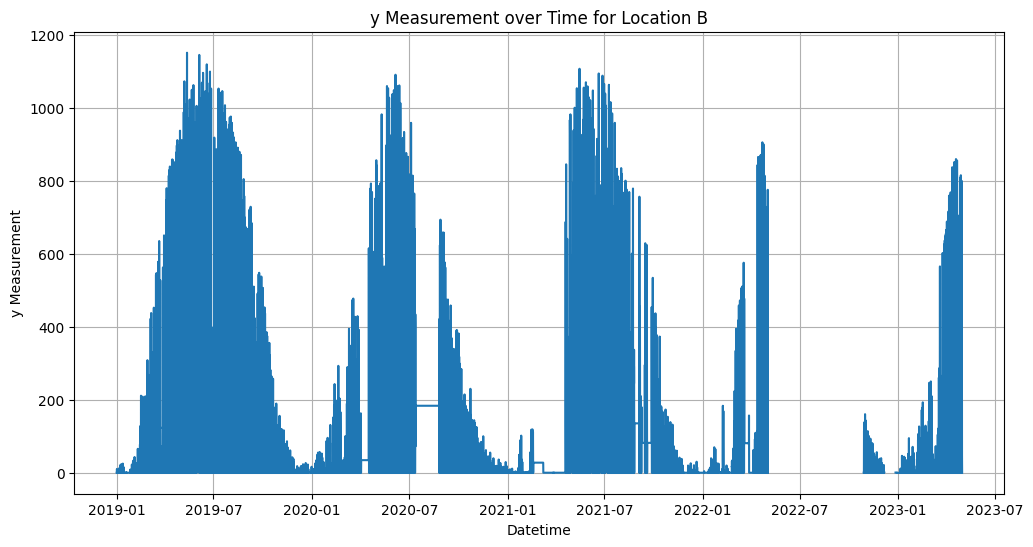

In [92]:
# Filter the DataFrame for location "A"
location = "B"

location_df = train_df[train_df['location'] == location]

# Convert the 'ds' column to datetime if it's not already in datetime format
location_df['ds'] = pd.to_datetime(location_df['ds'])

# Sort the DataFrame by datetime
location_df.sort_values(by='ds', inplace=True)

# Plot the 'y' values over time
plt.figure(figsize=(12, 6))
plt.plot(location_df['ds'], location_df['y'])
plt.xlabel('Datetime')
plt.ylabel('y Measurement')
plt.title(f'y Measurement over Time for Location {location}')
plt.grid(True)
plt.show()

C:\Users\Simen\AppData\Local\Temp\ipykernel_22660\2284422401.py:18: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  axs[i].scatter(location_df[column_name], location_df['y'], s=marker_size, cmap='viridis')


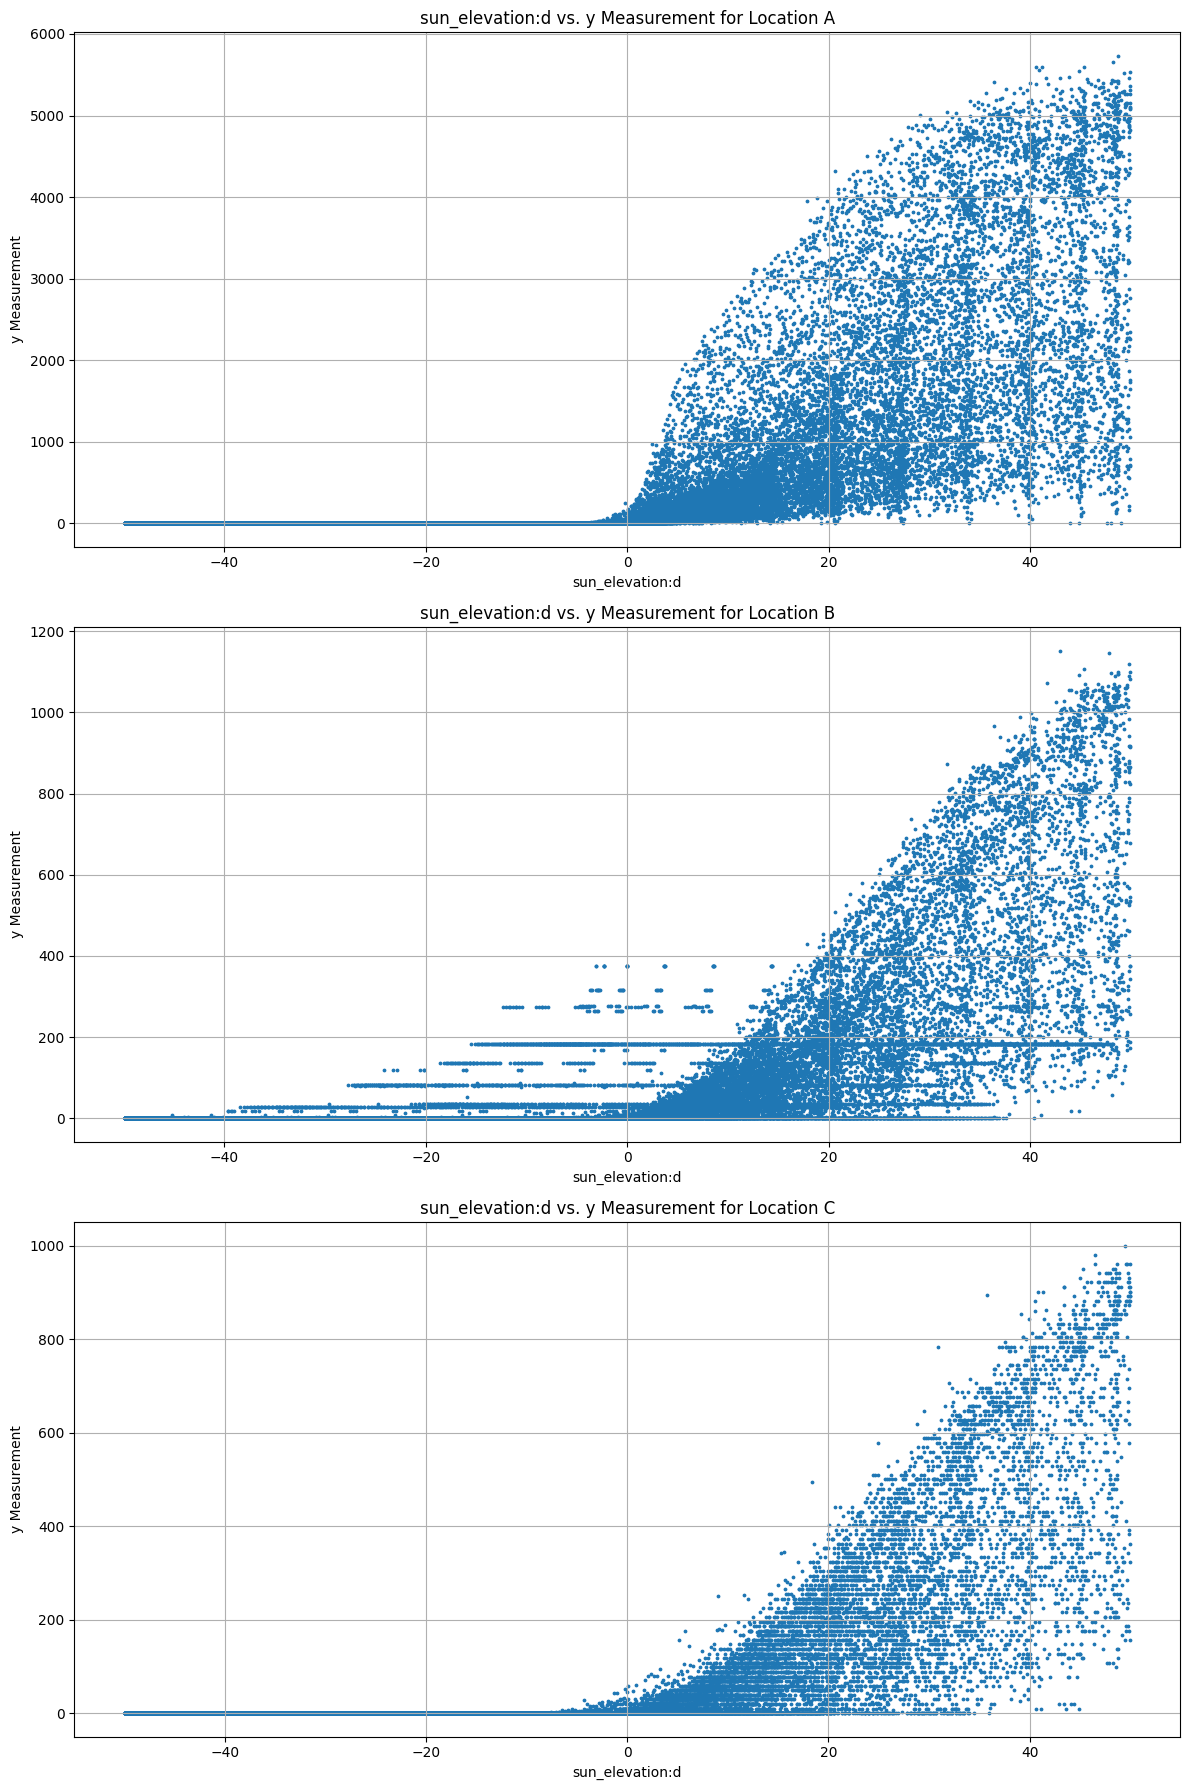

In [95]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the list of locations you want to plot
locations = ["A", "B", "C"]  # Add more locations as needed
column_name = 'sun_elevation:d'  # Replace with the column name you want to plot

# Define the marker size (adjust the value as needed)
marker_size = 3

# Create subplots for each location
fig, axs = plt.subplots(len(locations), figsize=(12, 6 * len(locations)))

# Loop through the locations and create a scatter plot for each
for i, location in enumerate(locations):
    location_df = train_df[train_df['location'] == location]
    
    axs[i].scatter(location_df[column_name], location_df['y'], s=marker_size, cmap='viridis')
    axs[i].set_xlabel(f'{column_name}')
    axs[i].set_ylabel('y Measurement')
    axs[i].set_title(f'{column_name} vs. y Measurement for Location {location}')
    axs[i].grid(True)

plt.tight_layout()
plt.show()

In [ ]:
### Hypam tuning for XGBoost

"""
Best params:  {'eta': 0.01219328924956422, 'lambda': 4.580604988629648, 'max_depth': 3}
Best params:  {'eta': 0.011983229080371582, 'lambda': 2.6513572746792122, 'max_depth': 4}
Best params:  {'eta': 0.010807077289330376, 'lambda': 2.3643961422084305, 'max_depth': 5}
Best params:  {'eta': 0.010808535901051918, 'lambda': 4.3146924250702225, 'max_depth': 3}
Best params:  {'eta': 0.14763621431874344, 'lambda': 2.5501389289555245, 'max_depth': 3}

Best params:  {'eta': 0.012446225606101442, 'lambda': 4.384309569375824, 'max_depth': 3}

"""

In [5]:
keep_columns = ['total_rad_1h:J',
                'fresh_snow_12h:cm',
                'snow_water:kgm2',
                'is_day:idx',
                'is_in_shadow:idx',
                'rain_water:kgm2',
                'sun_azimuth:d',
                'sun_elevation:d',
                't_1000hPa:K',
                'dew_or_rime:idx',
                'air_density_2m:kgm3',
                'absolute_humidity_2m:gm3',
                'y'
]

In [20]:
# Need this to unscale values again
scaler = None

def preprocess(df, has_target_col=False):
  window_len = 20
  batch_size = 32

  temp_df = df.copy()

  temp_df['total_rad_1h:J'] = df['diffuse_rad_1h:J'] + df['direct_rad_1h:J']

  # Only keep the columns in keep_columns that df actually has
  keep_columns_exist = [col for col in keep_columns if col in temp_df.columns]
  temp_df = temp_df[keep_columns_exist]

  
  # Clean out NaNs/NONEs -- May need to remove for more than just total_rad_1h:J
  temp_df = temp_df.dropna(axis=0, how="all", subset="total_rad_1h:J")

  if(has_target_col):
    temp_df = temp_df.dropna(axis=0, how="all", subset="y")

  # Min-max scale all columns so all values in [0, 1]
  scaler = MinMaxScaler()
  temp_np = scaler.fit_transform(temp_df)

  # Convert to time-series of given window-lengths 
  # (Sequence_length is how long each time-window is, sequence_stride is how long the window shifts forward in time for each sequence)
  if(has_target_col):
    num_features = temp_np.shape[1] - 1

    print("NUMBER OF FEATURES", num_features)

    features = temp_np[:, : num_features]
    targets = temp_np[:, num_features]

    temp_df = TimeseriesGenerator(data=features, targets=targets, length=window_len, shuffle=False, batch_size=batch_size)
 
  else:
    num_features = temp_np.shape[1]

    print("NUMBER OF FEATURES", num_features)

    features = temp_np[:, : num_features]
    dummy_targets = np.zeros(features.shape)

    temp_df = TimeseriesGenerator(data=features, targets=dummy_targets, length=window_len, shuffle=False, batch_size=batch_size)
  # Actually returns tensor BatchDataset
  return temp_df

In [ ]:
##################### TRAIN AND OUTPUT FOR DELIVERY #######################
import keras 

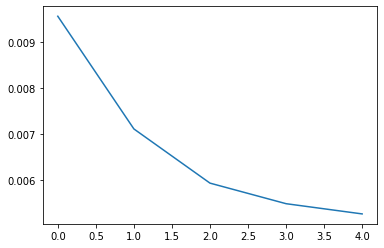

In [13]:
plt.plot(range(len(history.history['loss'])), history.history['loss'])

In [21]:
final_test_generator = preprocess(df_test)
out = model.predict(final_test_generator)

c:\Python39\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Python39\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


NUMBER OF FEATURES 12
67/67 [==============================] - 1s 7ms/step


In [25]:
print(out)
print(len(out))
print(len(df_test))
if(len(out) != len(df_test)):
  print("#################################################################")
  print("#################################################################")
  print("########################   PROBLEM          #####################")
  print("################# Likely due to removing Nan-vals  ##############")
  print("#################################################################")
  print("#################################################################")

[[ 0.00415007]
 [ 0.00823158]
 [ 0.00827513]
 ...
 [-0.00240877]
 [ 0.00286565]
 [ 0.00487237]]
2140
2160
#################################################################
#################################################################
########################   PROBLEM          #####################
################# Likely due to removing Nan-vals  ##############
#################################################################
#################################################################
